# Pre-processing (data calibration)

## 1. Setup

### 1.1. Check version information

In [1]:
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)") # current time
print(f"This notebook was generated at {now} ")

vv = %version_information astropy, numpy, scipy, matplotlib, version_information
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2023-05-03 21:11:16 (KST = GMT+0900) 
0 Python     3.10.10 64bit [GCC 11.3.0]
1 IPython    8.13.1
2 OS         Linux 4.15.0 191 generic x86_64 with glibc2.27
3 astropy    5.2.2
4 numpy      1.24.3
5 scipy      1.10.1
6 matplotlib 3.7.1
7 version_information 1.0.4


### 1.2. Import packages

In [2]:
import numpy as np

from astropy.io import fits                       # to handle FITS file
from astropy.visualization import ZScaleInterval  # to display data in z-scale

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from pathlib import Path                          # it is useful for directory-related tasks

### 1.3. Set parameters

In [3]:
DATAPATH = Path('./My_Data')                      # path of data directory
RAWPATH  = DATAPATH/'raw_data'                    # directory for raw data
CALPATH  = DATAPATH/'cal_data'                    # directory for saving the calibrated data

## 2. Open FITS File

### 2.1. Raw data

In [4]:
list_obj = list(RAWPATH.glob('M13-*V.fit'))       # gathering raw fits files of targets
list_obj.sort()                                    # sorting
list_obj

[PosixPath('My_Data/raw_data/M13-0001V.fit'),
 PosixPath('My_Data/raw_data/M13-0002V.fit'),
 PosixPath('My_Data/raw_data/M13-0003V.fit'),
 PosixPath('My_Data/raw_data/M13-0004V.fit'),
 PosixPath('My_Data/raw_data/M13-0005V.fit')]

In [5]:
hdul = fits.open(list_obj[0])                       # open fits file (HDUList)
hdul.info()

Filename: My_Data/raw_data/M13-0001V.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   (4096, 4096)   int16 (rescales to uint16)   


In [6]:
header      = hdul[0].header                        # get header from HDU
exptime_obj = header['EXPTIME']                     # exposure time (sec)
filter_obj  = header['FILTER']                      # filter
header

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 4096 /fastest changing axis                           
NAXIS2  =                 4096 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2023-04-27T13:50:11' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   60.000000000000000 /Exposure time in seconds                        
EXPOSURE=   60.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -10.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -10.000000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   9.00000000000000

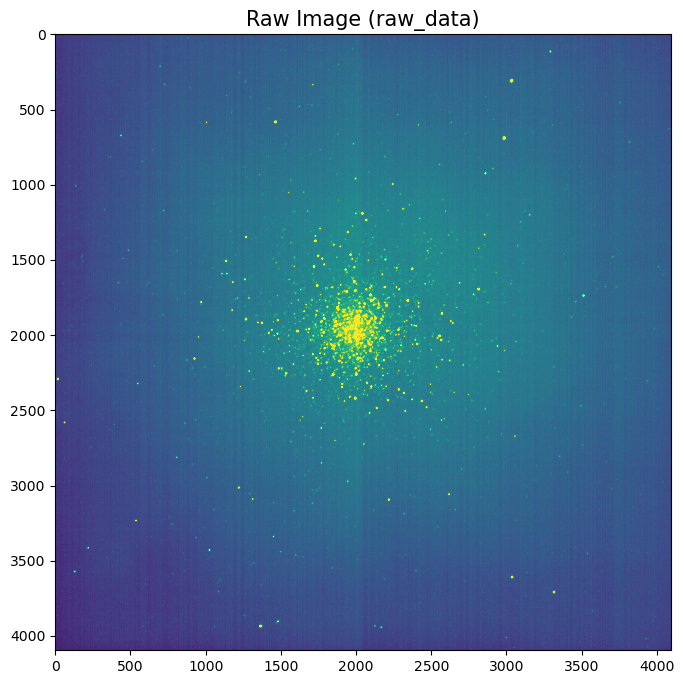

In [7]:
data_obj = hdul[0].data                            # get 2-dimensional raw data from HDU            

# plot figure
fig = plt.figure(figsize = (8, 8)); fontsize = 15

ax  = fig.add_subplot()
vmin, vmax = ZScaleInterval().get_limits(data_obj) # to plot in z-scale
ax.imshow(data_obj, vmin = vmin, vmax = vmax)
ax.set_title(f'Raw Image ({str(list_obj[0]).split("/")[1]})', fontsize = fontsize)
plt.show()

### 2.2. Bias, dark, and flat

In [8]:
list_bias = list(RAWPATH.glob('calibration-*bias.fit'))
list_dark = list(RAWPATH.glob(f'calibration-*dk{int(exptime_obj)}.fit')) # we need the dark with same exposure time
list_flat = list(RAWPATH.glob(f'Flat-*{filter_obj}.fit'))                # we need the flat with same filter

In [9]:
list_bias.sort()
list_bias

[PosixPath('My_Data/raw_data/calibration-0001bias.fit'),
 PosixPath('My_Data/raw_data/calibration-0002bias.fit'),
 PosixPath('My_Data/raw_data/calibration-0003bias.fit'),
 PosixPath('My_Data/raw_data/calibration-0004bias.fit'),
 PosixPath('My_Data/raw_data/calibration-0005bias.fit'),
 PosixPath('My_Data/raw_data/calibration-0006bias.fit'),
 PosixPath('My_Data/raw_data/calibration-0007bias.fit'),
 PosixPath('My_Data/raw_data/calibration-0008bias.fit'),
 PosixPath('My_Data/raw_data/calibration-0009bias.fit')]

In [10]:
list_dark.sort()
list_dark

[PosixPath('My_Data/raw_data/calibration-0001dk60.fit'),
 PosixPath('My_Data/raw_data/calibration-0002dk60.fit'),
 PosixPath('My_Data/raw_data/calibration-0003dk60.fit'),
 PosixPath('My_Data/raw_data/calibration-0004dk60.fit'),
 PosixPath('My_Data/raw_data/calibration-0005dk60.fit'),
 PosixPath('My_Data/raw_data/calibration-0006dk60.fit'),
 PosixPath('My_Data/raw_data/calibration-0007dk60.fit'),
 PosixPath('My_Data/raw_data/calibration-0008dk60.fit'),
 PosixPath('My_Data/raw_data/calibration-0009dk60.fit')]

In [11]:
list_flat.sort()
list_flat

[PosixPath('My_Data/raw_data/Flat-0001V.fit'),
 PosixPath('My_Data/raw_data/Flat-0002V.fit'),
 PosixPath('My_Data/raw_data/Flat-0003V.fit'),
 PosixPath('My_Data/raw_data/Flat-0004V.fit'),
 PosixPath('My_Data/raw_data/Flat-0005V.fit'),
 PosixPath('My_Data/raw_data/Flat-0006V.fit'),
 PosixPath('My_Data/raw_data/Flat-0007V.fit')]

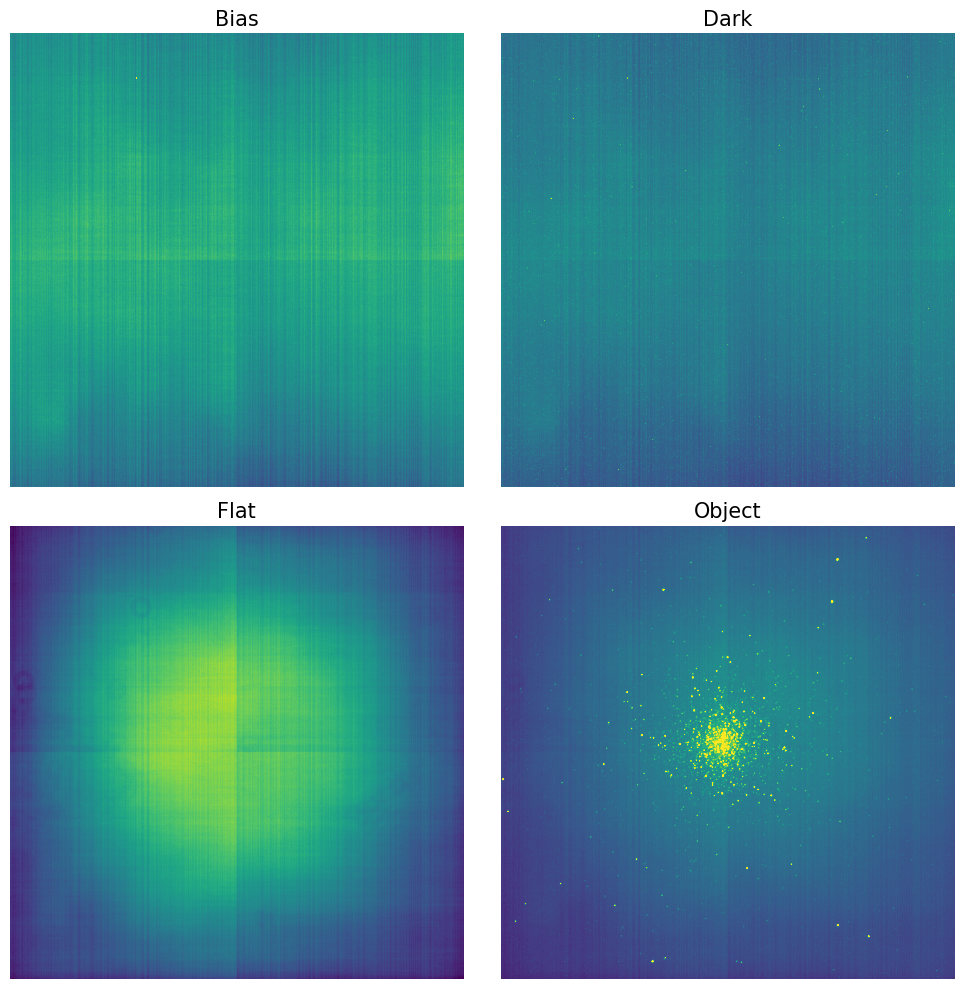

In [12]:
data_bias = fits.getdata(list_bias[0])
data_dark = fits.getdata(list_dark[0])
data_flat = fits.getdata(list_flat[0])

dict_data = {'Bias'   : data_bias,
             'Dark'   : data_dark,
             'Flat'   : data_flat,
             'Object' : data_obj}

fig = plt.figure(figsize = (10, 10)); fontsize = 15
gridspec = GridSpec(nrows = 2, ncols = 2)

for i, keys in enumerate(dict_data.keys()):
    
    data = dict_data[keys]
    
    ax = fig.add_subplot(gridspec[i])
    vmin, vmax = ZScaleInterval().get_limits(data)
    ax.imshow(data, vmin = vmin, vmax = vmax)
    ax.axis('off')
    ax.set_title(keys, fontsize = fontsize)
    
plt.tight_layout()
plt.show()

## 3. Master Bias, Master Dark, Master Flat

### 3.1. Master bias
$Master~bias = Median([bias1,~bias2,~bias3,~...])$

In [13]:
array_bias = np.zeros((len(list_bias), np.shape(data_bias)[0], np.shape(data_bias)[1])) # Ndata x 4096 x 4096

for i, bias in enumerate(list_bias):
    data_bias = fits.getdata(bias)
    array_bias[i] = data_bias

data_mbias = np.median(array_bias, axis = 0) # master bias (median combining)

### 3.2. Master dark
$Master~dark = Median([dark1,~dark2,~dark3,~...]) - Master~bias$

<span style='color:red'>Caution</span>: All dark in the list should have same exposure time with target.

In [14]:
array_dark = np.zeros((len(list_dark), np.shape(data_dark)[0], np.shape(data_dark)[1]))

for i, dark in enumerate(list_dark):
    data_dark = fits.getdata(dark)
    array_dark[i] = data_dark

data_mdark = np.median(array_dark, axis = 0) - data_mbias # master dark
data_mdark[data_mdark<0] = 0.                             # Correct the negative values

### 3.3. Master flat
$Master~flat = Median([flat1,~flat2,~flat3,~...]) - Master~dark - Master~bias$

<span style='color:red'>Caution</span>: The master dark should represent same exposure time with Flat (different from 3.2.'s master dark!) 

In [15]:
array_flat = np.zeros((len(list_flat), np.shape(data_flat)[0], np.shape(data_flat)[1]))

# extract exposure time from flat images, and repeat 3.2.
exptime_flat = fits.getheader(list_flat[0])['EXPTIME']
list_fdark = list(RAWPATH.glob(f'calibration-*dk{int(exptime_flat)}.fit'))
list_fdark.sort()
data_fdark = fits.getdata(list_fdark[0])

array_fdark = np.zeros((len(list_fdark), np.shape(data_fdark)[0], np.shape(data_fdark)[1]))
for i, fdark in enumerate(list_fdark):
    data_fdark = fits.getdata(fdark)
    array_fdark[i] = data_fdark

data_mfdark = np.median(array_fdark, axis = 0) - data_mbias
data_mfdark[data_mfdark<0] = 0.                             

# master flat
array_flat = np.zeros((len(list_flat), np.shape(data_flat)[0], np.shape(data_flat)[1]))

for i, flat in enumerate(list_flat):
    data_flat = fits.getdata(flat)
    array_flat[i] = data_flat

data_mflat = np.median(array_flat, axis = 0) - data_mfdark - data_mbias # master flat
data_mflat /= np.max(data_mflat)                                        # normalization

## 4. Image Pre-processing

### 4.1. Data calibration
$Calibrated~data = (Raw~data - Master~dark - Master~bias)~/~Master~flat$

In [16]:
data_cal_obj = (data_obj - data_mbias - data_mdark) / data_mflat # calibrated data

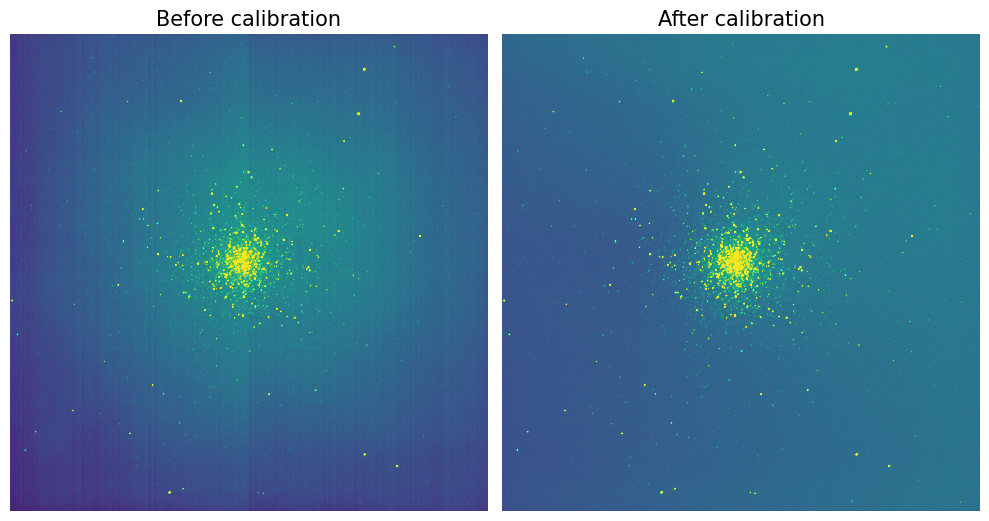

In [17]:
dict_data = {'Before calibration': data_obj,
             'After calibration' : data_cal_obj}

fig = plt.figure(figsize = (10, 10)); fontsize = 15
gridspec = GridSpec(nrows = 1, ncols = 2)

for i, keys in enumerate(dict_data.keys()):
    
    data = dict_data[keys]
    
    ax = fig.add_subplot(gridspec[i])
    vmin, vmax = ZScaleInterval().get_limits(data)
    ax.imshow(data, vmin = vmin, vmax = vmax)
    ax.axis('off')
    ax.set_title(keys, fontsize = fontsize)
    
plt.tight_layout()
plt.show()

### 4.2. Save the result

In [18]:
for obj in list_obj:
    
    # image calibration for all images
    data_obj, header_obj = fits.getdata(obj, header = True)
    data_cal_obj = (data_obj - data_mbias - data_mdark) / data_mflat
    
    CALPATH.mkdir(exist_ok = True)
    fits.writeto(CALPATH / (str(obj).split('.')[0].split('/')[-1] + '_cal.fit'), data_cal_obj, header_obj, overwrite = True)